In [1]:
import ee
!pip install geemap

# Trigger the authentication flow.
ee.Authenticate()

ee.Initialize()
import geemap.eefolium as emap

     |████████████████████████████████| 378kB 2.8MB/s 
     |████████████████████████████████| 4.7MB 12.7MB/s 
     |████████████████████████████████| 501kB 35.5MB/s 
     |████████████████████████████████| 102kB 10.0MB/s 
     |████████████████████████████████| 102kB 9.2MB/s 
     |████████████████████████████████| 5.1MB 33.1MB/s 
     |████████████████████████████████| 1.1MB 38.9MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 225kB 49.0MB/s 
     |████████████████████████████████| 122kB 45.7MB/s 
  Created wheel for geemap: filename=geemap-0.7.2-py2.py3-none-any.whl size=361898 sha256=560b39768cb19b1a9b43f8e7128ee1a20ba3fdd30fedda035830e6f6109c4f20
  Stored in directory: /root/.cache/pip/wheels/ec/55/69/005f24a76b4451b48478b50f707630177731dec756006aeca8
  Created wheel for ipynb-py-convert: filename=ipynb_py_convert-0.4.5-cp36-none-any.whl size=4323 sha256=21a59472bd84b390652b8e33d21d95b70288735e3fb317c105203e91e41d2165
  Stored in 

In [6]:
import re, datetime
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
!pip install ipdb
import ipdb
from scipy import signal
from skimage import measure
from skimage import util
# Initialize the library.

test_uid = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
test_title = 'first'
test_name = '-'.join([test_uid,test_title])
#test_uid = "today"

  Created wheel for ipdb: filename=ipdb-0.13.3-cp36-none-any.whl size=10848 sha256=807bec0a4118dc3b08394ccb8d294166bd21c9348966dfb6bd130f16b22e811b
  Stored in directory: /root/.cache/pip/wheels/75/00/30/4169bcc3643f0cf946dcf37af1b71364b390c4df91da02b03c
Successfully built ipdb


In [10]:
# for both requests and normal dict
from requests import get, models
import json
from IPython.display import HTML

render_template = """
<script src="https://rawgit.com/caldwell/renderjson/master/renderjson.js"></script>
<script>
renderjson.set_show_to_level(1)
document.body.appendChild(renderjson(%s))
new ResizeObserver(google.colab.output.resizeIframeToContent).observe(document.body)
</script>
"""
models.Response._repr_html_ = lambda rsp: render_template % rsp.text

def render(jsondict):
  return HTML(render_template % json.dumps(jsondict))

In [ ]:
def afunction():
  roi = ee.Geometry.Rectangle([9.449278,11.379924,9.460719,11.391494])
  import ipdb; ipdb.set_trace()
  Map = emap.Map()
  Map.addLayer(roi)
  Map.centerObject(roi,16)
  return 4

afunction()
Map.addLayerControl()
Map

> <ipython-input-14-b480a4f980ed>(4)afunction()
      3   import ipdb; ipdb.set_trace()
----> 4   Map = emap.Map()
      5   Map.addLayer(roi)

ipdb> roi
ipdb> n
> <ipython-input-14-b480a4f980ed>(5)afunction()
      4   Map = emap.Map()
----> 5   Map.addLayer(roi)
      6   Map.centerObject(roi,16)



In [ ]:
#controlImage = ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(roi).filterDate('2019-01-01','2019-02-01').first() # Sentinel 10m
test_image = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterBounds(roi).filterDate('2019-01-01','2019-02-01').first() # Landsat 30m
test_image = test_image.clip(roi)
ndvi_image = test_image.normalizedDifference(['B5','B4'])
Map = emap.Map()
#Map.addLayerControl()
sentinelVisParams = {"opacity":1,"bands":["B4","B3","B2"],"max":3000,"gamma":1}
landsatVisParams = {"opacity":1,"bands":["B4","B3","B2"],"min":0,"max":3000,"gamma":1}
ndviVisParams = {"opacity":1,"bands":["nd"],"min":0,"max":0.5,"palette":["ff0000","00ff00"]};
Map.addLayer(test_image,vis_params = landsatVisParams, name="Landsat")
Map.addLayer(ndvi_image,vis_params = ndviVisParams, name="NDVI")
Map.addLayer(roi,name="ROI")
Map.centerObject(roi,16)
Map.add_layer_control()
Map

In [ ]:
projection = my_image.select(1).projection()
projection.nominalScale().getInfo()

In [ ]:
task = ee.batch.Export.image.toDrive(image=ndvi, description='ndvi-first-test', folder='resampling', region=roi, scale=30)
task.start()

In [ ]:
task.status()

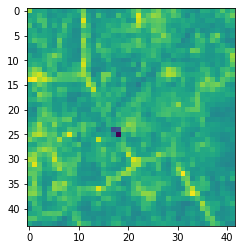

In [ ]:
# input data
ndvi = gdal.Open("/content/drive/My Drive/resampling/ndvi-first-test.tif")
ndvi = np.array(ndvi.GetRasterBand(1).ReadAsArray())
plt.imshow(ndvi)

In [ ]:
# basic classification parameters
bins = [0.0, 0.1, 0.2, 0.3, 1.0]
classes = list(range(1, len(bins)))
classes

[1, 2, 3, 4]

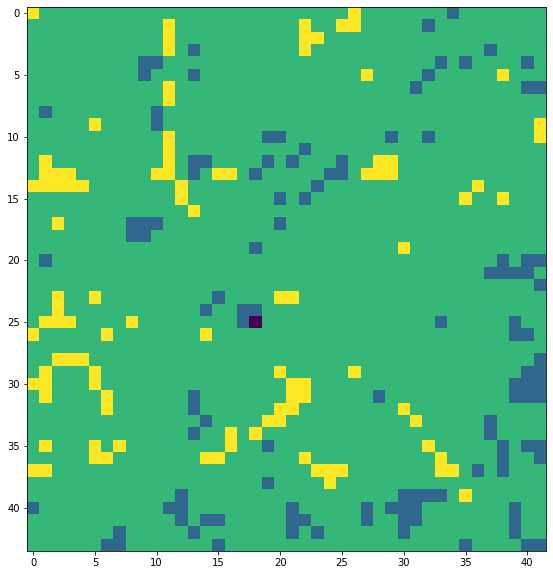

In [ ]:
# classify native resolution
classified = np.digitize(ndvi,bins=bins)
plt.figure(figsize=(10,10))
plt.imshow(classified, aspect='equal')

In [ ]:
# Stats on the native resolution classification
(unique, counts) = np.unique(classified, return_counts=True)
#which = np.setdiff1d(n,unique)
#print(type(which))

#counts = np.insert(counts,(4),0)
#counts = np.insert(counts,(5),0)
#print((unique,counts))
scale = 30
areas = counts*scale*scale # Areas of each class
print('unique ',unique)
print('counts',counts)
print('areas',areas)
checksum=areas.sum()
print('correct checksum',checksum)

unique  [1 2 3 4]
counts [   1  120 1623  104]
areas [    900  108000 1460700   93600]
correct checksum 1663200


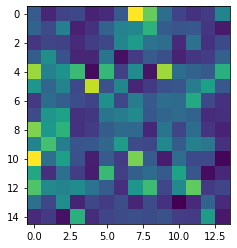

In [ ]:
# Basic downsample, every third pixel, both axes
nn_ndvi = ndvi[1::3,1::3].copy()
plt.imshow(nn_ndvi, aspect='equal')

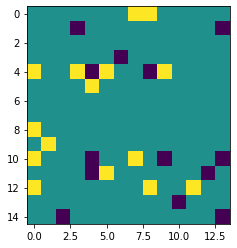

In [ ]:
# NN classification
nn_classified = np.digitize(nn_ndvi,bins=bins)
plt.imshow(nn_classified, aspect='equal')

In [ ]:
# Stats on the nn classified image
(nn_unique, nn_counts) = np.unique(nn_classified, return_counts=True)
print('unique ',nn_unique)
print('counts',nn_counts)
nn_counts = [np.insert(nn_counts,classes.index(i),0) for i in list(set(classes)-set(nn_unique))][0]
print('nn_counts',nn_counts)
scale = 90
nn_areas = nn_counts*scale*scale # Areas of each class
print(nn_areas)
print('literal checksum','ok' if checksum==nn_areas.sum() else checksum-nn_areas.sum())

unique  [2 3 4]
counts [ 13 182  15]
nn_counts [  0  13 182  15]
[      0  105300 1474200  121500]
literal checksum -37800


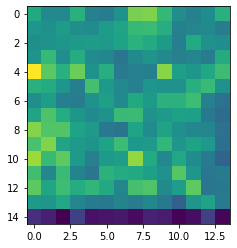

In [ ]:
# average downsample
mean_ndvi = measure.block_reduce(ndvi,(3,3),np.mean)
plt.imshow(mean_ndvi, aspect='equal')

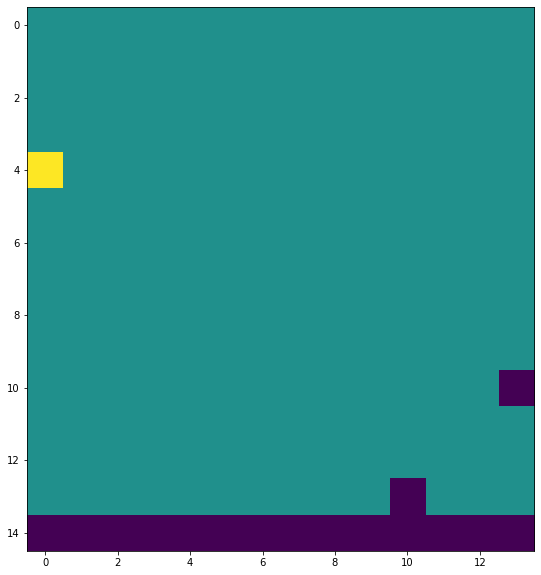

In [ ]:
# mean classification
mean_classified = np.digitize(mean_ndvi,bins=bins)
plt.figure(figsize=(10,10))
plt.imshow(mean_classified, aspect='equal')

In [ ]:
# Stats on the mean classified image
(mean_unique, mean_counts) = np.unique(mean_classified, return_counts=True)
print('unique ',mean_unique)
print('counts',mean_counts)
mean_counts = [np.insert(mean_counts,classes.index(i),0) for i in list(set(classes)-set(mean_unique))][0]
print('mean_counts',mean_counts)
scale = 90
mean_areas = mean_counts*scale*scale # Areas of each class
print(mean_areas)
print('literal checksum','ok' if checksum==mean_areas.sum() else checksum-mean_areas.sum())

unique  [2 3 4]
counts [ 16 193   1]
mean_counts [  0  16 193   1]
[      0  129600 1563300    8100]
literal checksum -37800


In [9]:
# random nn
def random_choice(array,axis=None,seed=None):
  import ipdb; ipdb.set_trace()
  rng = np.random.default_rng(seed)
  original_size = tuple(l * c for l, c in zip(array.shape[:len(array.shape)//2],array.shape[len(array.shape)//2:]))
  array = array.reshape(original_size)
  array = rng.choice(array,axis = 1)
  return array.reshape(axis)
#reduced_random_choice_image = measure.block_reduce(random_image,(3,3),random_choice,func_kwargs={'seed':1})
rnn_ndvi = measure.block_reduce(ndvi,(3,3),random_choice,func_kwargs={'seed':1})
plt.imshow(rnn_ndvi, aspect='equal')
#rnn_ndvi

NameError: ignored

In [8]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [7]:
# angle between original classes and nn
nn_angle=angle_between(areas,nn_areas)
import ipdb; ipdb.set_trace()
np.degrees(nn_angle)
np.linalg.norm(areas-nn_areas)

NameError: ignored

In [ ]:
# angle between original classes and mean
mean_angle=angle_between(areas,mean_areas)
np.degrees(mean_angle)
np.linalg.norm(areas-mean_areas)

135293.6805619538

In [ ]:
!ls -A /da

app.js		jupyter.js    package.json	 server.js
appSettings.js	logging.js    package-lock.json  sockets.js
config		node_modules  reverseProxy.js
